In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

import warnings

In [2]:
#Cargando datos
Dengue = pd.read_csv("Datos_2023_210.csv")
#Informacion de los datos
print(Dengue.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15587 entries, 0 to 15586
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CONSECUTIVE                15587 non-null  int64  
 1   COD_EVE                    15587 non-null  int64  
 2   FEC_NOT                    15587 non-null  object 
 3   SEMANA                     15587 non-null  int64  
 4   ANO                        15587 non-null  int64  
 5   COD_PRE                    15587 non-null  int64  
 6   COD_SUB                    15587 non-null  int64  
 7   EDAD                       15587 non-null  int64  
 8   UNI_MED                    15587 non-null  int64  
 9   nacionalidad               15587 non-null  int64  
 10  nombre_nacionalidad        15587 non-null  object 
 11  SEXO                       15587 non-null  object 
 12  COD_PAIS_O                 15587 non-null  int64  
 13  COD_DPTO_O                 15587 non-null  int

/tmp/ipykernel_3167/2248513276.py:2: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  Dengue = pd.read_csv("Datos_2023_210.csv")


In [3]:
Dengue.describe()

,CONSECUTIVE,COD_EVE,SEMANA,ANO,COD_PRE,COD_SUB,EDAD,UNI_MED,nacionalidad,COD_PAIS_O,...,FEC_DEF,AJUSTE,CER_DEF,CBMTE,FM_FUERZA,FM_GRADO,confirmados,consecutive_origen,va_sispro,Estado_final_de_caso
count,1.558700e+04,15587.0,15587.000000,15587.0,1.558700e+04,15587.000000,15587.000000,15587.000000,15587.000000,15587.000000,...,0.0,15586.000000,0.0,0.0,66.000000,66.000000,15586.000000,15586.000000,15586.0,15586.000000
mean,1.037578e+07,210.0,30.141528,2023.0,5.053953e+09,4.847950,21.968756,1.016745,183.138320,170.758773,...,NaN,2.086103,NaN,NaN,3.393939,23.409091,0.794238,57594.255806,1.0,2.952842
std,2.469143e+05,0.0,15.630054,0.0,2.603742e+09,11.327848,18.049762,0.132741,94.065724,22.995939,...,NaN,2.371476,NaN,NaN,0.629500,30.007680,0.404270,31602.606594,0.0,0.721650
min,9.821620e+06,210.0,1.000000,2023.0,5.001000e+08,0.000000,1.000000,1.000000,32.000000,56.000000,...,NaN,0.000000,NaN,NaN,3.000000,0.000000,0.000000,44.000000,1.0,2.000000
25%,1.010556e+07,210.0,17.000000,2023.0,2.346600e+09,1.000000,9.000000,1.000000,170.000000,170.000000,...,NaN,0.000000,NaN,NaN,3.000000,0.000000,1.000000,36358.250000,1.0,3.000000
50%,1.038405e+07,210.0,32.000000,2023.0,5.262101e+09,1.000000,16.000000,1.000000,170.000000,170.000000,...,NaN,3.000000,NaN,NaN,3.000000,0.000000,1.000000,51404.500000,1.0,3.000000
75%,1.040856e+07,210.0,45.000000,2023.0,7.348301e+09,2.000000,30.000000,1.000000,170.000000,170.000000,...,NaN,3.000000,NaN,NaN,4.000000,64.000000,1.000000,79749.750000,1.0,3.000000
max,1.079265e+07,210.0,52.000000,2023.0,9.977300e+09,99.000000,100.000000,4.000000,862.000000,862.000000,...,NaN,7.000000,NaN,NaN,5.000000,65.000000,1.000000,117535.000000,1.0,5.000000


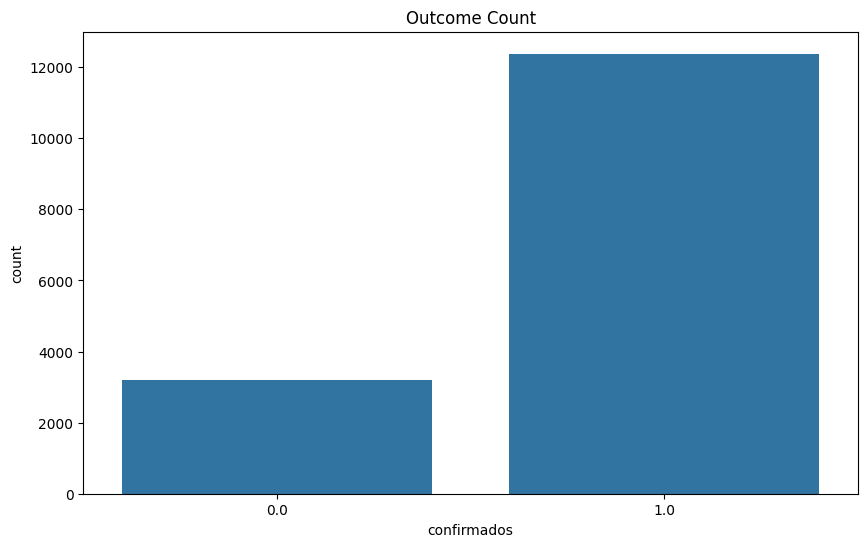

In [4]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='confirmados',data=Dengue)
plt.title("Outcome Count")
plt.show()


El conjunto consiste de dos clases, 0 para pacientes no confirmados y 1 para confirmados

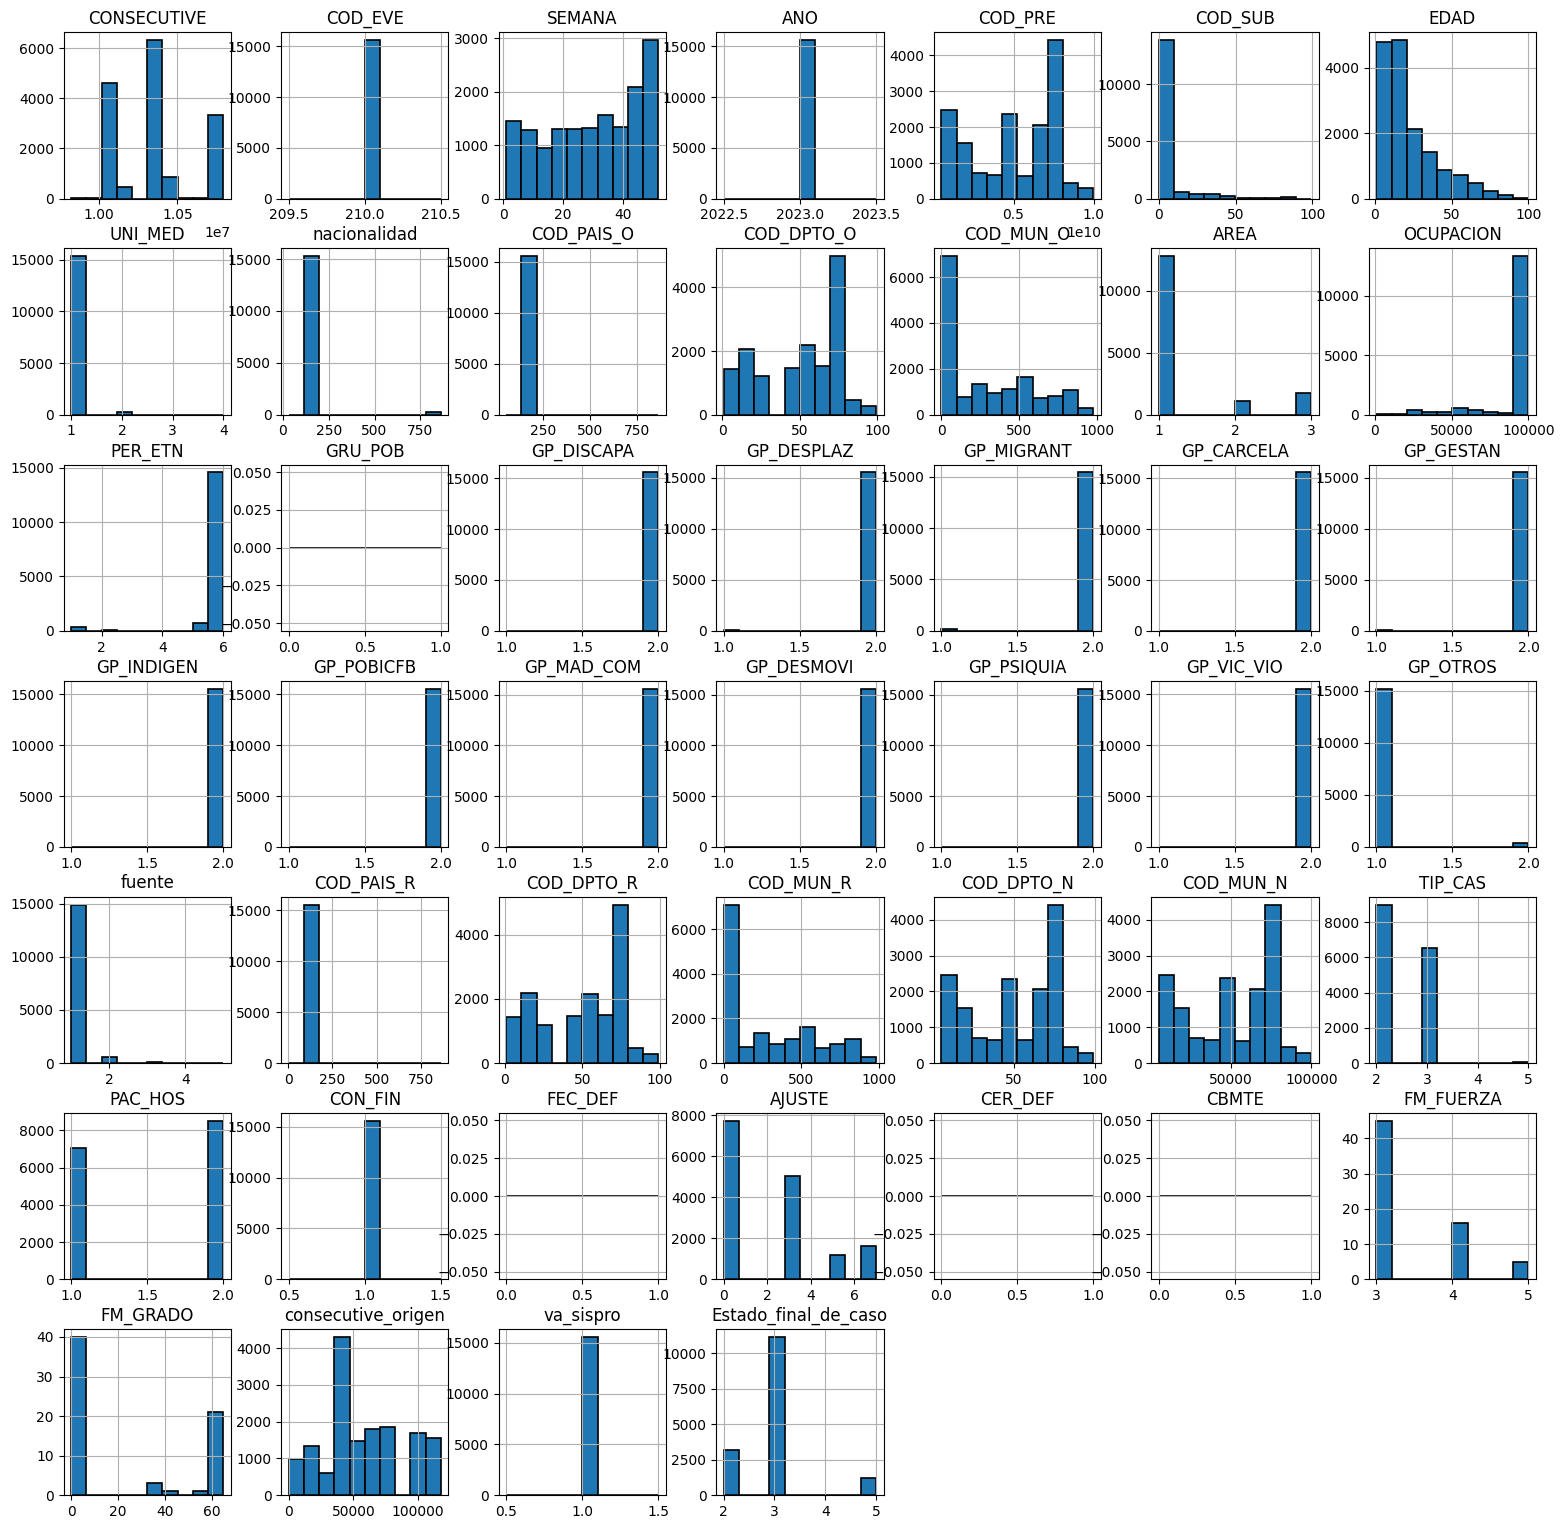

In [5]:

dengue_var = Dengue.drop(['confirmados'], axis=1)
dengue_var.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(19,19)
plt.show()

In [6]:
Dengue.isna().sum()

CONSECUTIVE                  0
COD_EVE                      0
FEC_NOT                      0
SEMANA                       0
ANO                          0
                            ..
Pais_residencia              1
Departamento_residencia      1
Municipio_residencia         1
Departamento_Notificacion    1
Municipio_notificacion       1
Length: 73, dtype: int64

In [7]:
cols = ['SEMANA', 'EDAD', 'Estado_final_de_caso', 'consecutive_origen', 'COD_DPTO_R']
Dengue[cols] = Dengue[cols].replace({0:np.nan})

Dengue.isna().sum()

CONSECUTIVE                  0
COD_EVE                      0
FEC_NOT                      0
SEMANA                       0
ANO                          0
                            ..
Pais_residencia              1
Departamento_residencia      1
Municipio_residencia         1
Departamento_Notificacion    1
Municipio_notificacion       1
Length: 73, dtype: int64

In [9]:
X_train = Dengue.drop(['confirmados'], axis=1) # Separa las variables predictoras de las variable a predecir
y_train = Dengue['confirmados']



ValueError: could not convert string to float: '2023-12-11'

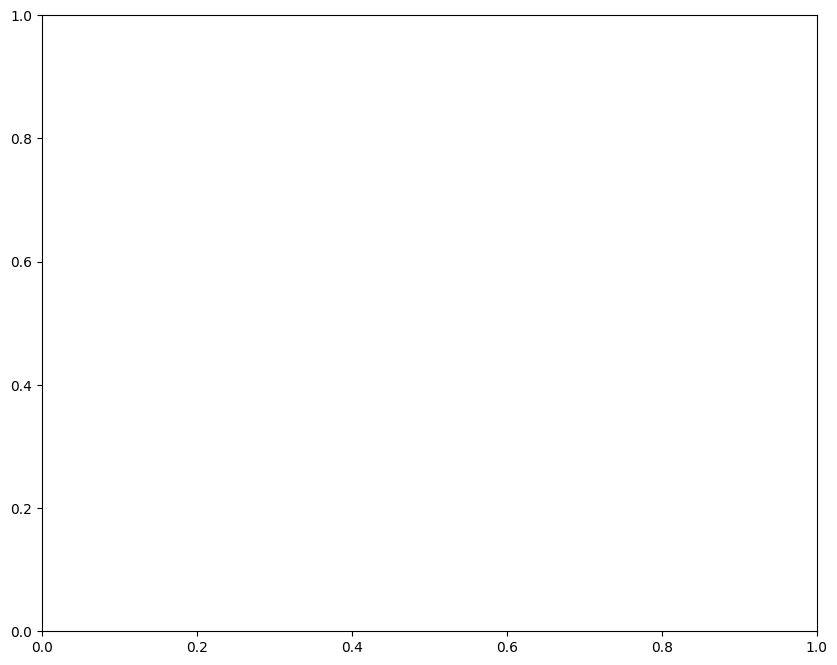

In [10]:


f, ax = plt.subplots(figsize=(10, 8))
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5)
plt.show() 

